In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Import Train

In [8]:
df = pd.read_csv('train.csv')
df = pd.DataFrame(df)
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


## Import Test

In [9]:
df_test = pd.read_csv('test.csv')
df_test = pd.DataFrame(df_test)
df_test = df_test.drop('id', axis= 1)
df_test.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0
999,1270,1,0.5,0,4,1,35,0.1,140,6,19,457,608,2828,9,2,3,1,0,1


## Spliting Train Dataset between Train and Validation

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('price_range', axis= 1)
Y = df['price_range']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
Train = DT.fit(X_train, Y_train)
Result = Train.predict(X_test)

0.8425
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       117
           1       0.74      0.84      0.79        82
           2       0.80      0.75      0.78       102
           3       0.86      0.88      0.87        99

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



Text(113.9222222222222, 0.5, 'Predicted')

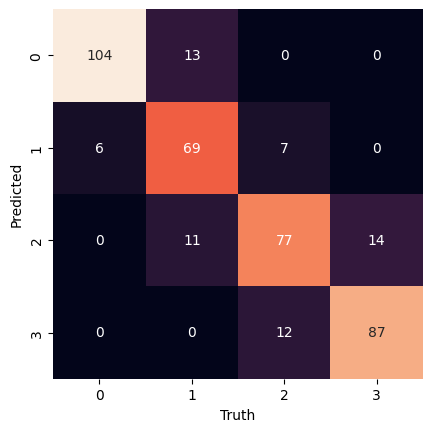

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(accuracy_score(Result, Y_test))
print(classification_report(Result, Y_test))

cm = confusion_matrix(Result, Y_test)
names = np.unique(Result)
sns.heatmap(cm, square= True, annot= True, fmt= 'd', cbar= False, xticklabels= names, yticklabels= names)
plt.xlabel('Truth')
plt.ylabel('Predicted')